# pyMMF: Find modes of bent fibers

We compare here the two methods for finding the modes of a bent fiber as explained in this [tutorial](http://wavefrontshaping.net/index.php/component/content/article/68-community/tutorials/multimode-fibers/149-multimode-fiber-modes-part-2).

In [34]:
import pyMMF
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('figure', figsize=(26,15))
rc('text', usetex=True)
from IPython.display import display, Math
from ipywidgets import interact

## Fiber parameters

In [12]:
## Parameters
NA = 0.1
radius = 7. # in microns
areaSize = 3.2*radius # calculate the field on an area larger than the diameter of the fiber
npoints = 2**7 # resolution of the window
n1 = 1.45
wl = 0.6328 # wavelength in microns
poisson = 0.17 # Poisson coefficient of the fiber core material
curvature = [5e4,3e4] # curvature in microns
# Only works for large curvatures! 

## Instantiate the solver

In [13]:
# Create the fiber object
profile = pyMMF.IndexProfile(npoints = npoints, areaSize = areaSize)

# Initialize the index profile
profile.initStepIndex(n1=n1,a=radius,NA=NA)

# Instantiate the solver
solver = pyMMF.propagationModeSolver()

# Set the profile to the solver
solver.setIndexProfile(profile)

# Set the wavelength
solver.setWL(wl)

# Set the Poisson coefficient
solver.setPoisson(poisson)

# Estimate the number of modes for a graded index fiber
Nmodes_estim = pyMMF.estimateNumModesSI(wl,radius,NA,pola=1)

print(f"Estimated number of modes using the V number = {Nmodes_estim}")

2019-05-24 18:46:02,307 - pyMMF.core [DEBUG  ]  Debug mode ON.


Estimated number of modes using the V number = 13


## Numerical calculations for the straight fiber

In [14]:
modes_straight = solver.solve(nmodesMax=Nmodes_estim+20,boundary = 'close', mode = 'eig', curvature = None, propag_only=False)
Nmodes = sum(modes_straight.propag) # Compute for the bent fiber the same number of modes as for the straight one
modes_straight.sort()

2019-05-24 18:46:02,536 - pyMMF.core [INFO   ]  Solving the spatial eigenvalue problem for mode finding.
2019-05-24 18:46:02,541 - pyMMF.core [INFO   ]  Use close boundary condition.
2019-05-24 18:46:09,706 - pyMMF.core [INFO   ]  Solver found 33 modes is 7.17 seconds.
2019-05-24 18:46:09,707 - pyMMF.core [WARNING]  The solver reached the maximum number of modes set.
2019-05-24 18:46:09,708 - pyMMF.core [WARNING]  Some propagating modes may be missing.
2019-05-24 18:46:09,709 - pyMMF.core [DEBUG  ]  Mode data stored in memory.


## Numerical calculation for the bent fiber - Method 1

In [15]:
modes_bent = solver.solve(nmodesMax=Nmodes,boundary = 'close', mode = 'eig', curvature = curvature, propag_only=False)
modes_bent.sort()
betas_bent = modes_bent.betas
profiles_bent = modes_bent.getModeMatrix()

2019-05-24 18:46:09,715 - pyMMF.core [INFO   ]  Solving the spatial eigenvalue problem for mode finding.
2019-05-24 18:46:09,716 - pyMMF.core [INFO   ]  Use close boundary condition.
2019-05-24 18:46:10,794 - pyMMF.core [INFO   ]  Solver found 12 modes is 1.08 seconds.
2019-05-24 18:46:10,795 - pyMMF.core [WARNING]  The solver reached the maximum number of modes set.
2019-05-24 18:46:10,795 - pyMMF.core [WARNING]  Some propagating modes may be missing.
2019-05-24 18:46:10,796 - pyMMF.core [DEBUG  ]  Mode data stored in memory.


## Numerical calculation for the bent fiber - Method 2

In [16]:
betas_bent2,profiles_bent2 = modes_straight.getCurvedModes(npola = 1,curvature=curvature)
betas_bent2,profiles_bent2 = betas_bent2[:Nmodes],profiles_bent2[:,:Nmodes]

## Comparison between the two approaches

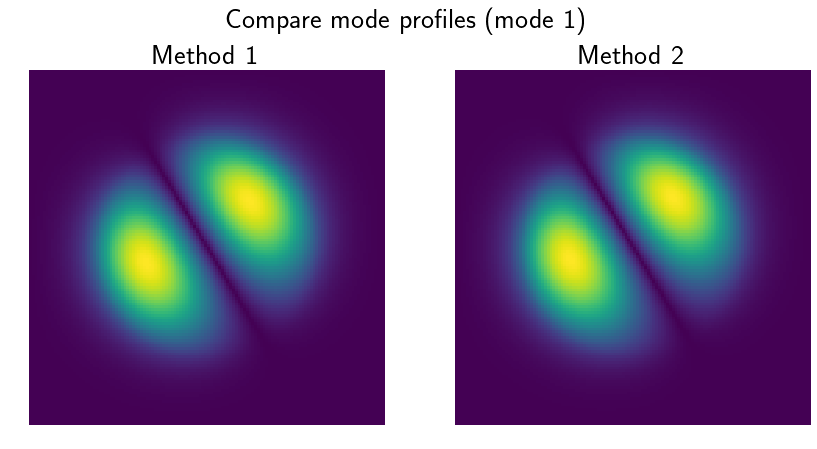

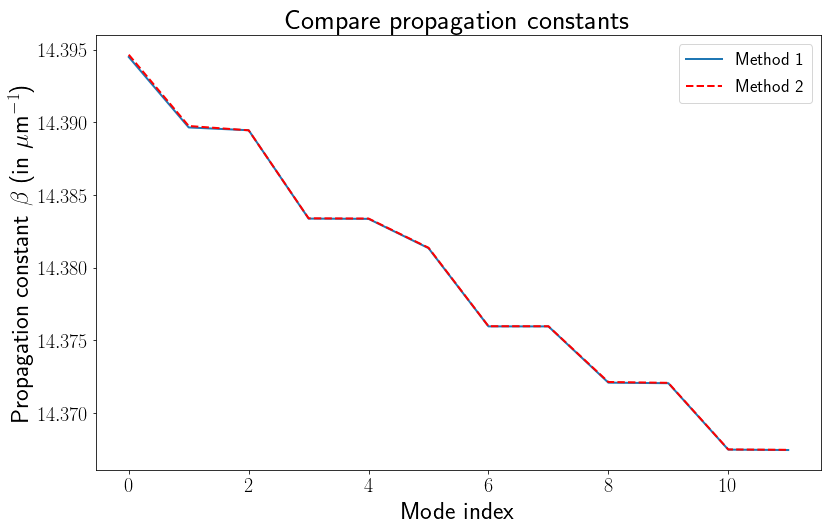

In [47]:
mode_ind = 1

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title(r'Method 1' ,fontsize = 28)
plt.imshow(np.abs(profiles_bent[:,mode_ind].reshape([npoints]*2)))
plt.axis('off')
plt.subplot(122)
plt.title(r'Method 2' ,fontsize = 28)
plt.imshow(np.abs(profiles_bent2[:,mode_ind].reshape([npoints]*2)))
plt.axis('off')
plt.suptitle(f"Compare mode profiles (mode {mode_ind})",fontsize = 28)

plt.figure(figsize=(13,8))
plt.title(r'Compare propagation constants',fontsize = 28)
plt.plot(betas_bent,label='Method 1',linewidth=2)
plt.plot(betas_bent2,'r--',label='Method 2',linewidth=2)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(r'Propagation constant $\beta$ (in $\mu$m$^{-1}$)', fontsize = 25)
plt.xlabel(r'Mode index', fontsize = 25)
plt.legend(fontsize = 18)